An image is padded with extra pixels in order to perform the convolution operation on the boundary pixels. Different types of padding lead to different effects. 

Constant Padding - The boundary are padded with pixels having a particular value. If this value is 0 then it becomes zero padding.
In Morphological Processing - For erosion , a one padding is used and for dilation a zero padding is used.

Periodic Padding - In this scheme the image is repeated(tiled). This corresponds to periodic convolution, images generally do not satisfy this assumption i.e the texture on the right border can be very different from the left border etc, hence this also leads to discontinuities.

Symmetric Padding - In this scheme the pixels are reflected across the boundary. This leads to smoother transitions at the boundary preventing the creation of high frequency components


In [1]:
def padImage(im,filter_shape,padding_type="zero",constant = 0) :
    im_size = im.shape 
    padding_thickness = [x/2 for x in filter_shape]
    lower_corner = (padding_thickness[0]+im_size[0],padding_thickness[1]+im_size[1])
    im_col_flipped = im[:,-1::-1]
    im_row_flipped = im[-1::-1,:]
    im_both_flipped = im[-1::-1,-1::-1]
    zeros = np.ones(im_size)*constant #constant padding on the borders, since default value of constant is 0, this becomes zero padding.
    if padding_type == "zero" :
            new_im = np.vstack([np.hstack([zeros,zeros,zeros]),
                                np.hstack([zeros,im,zeros]),
                                np.hstack([zeros,zeros,zeros])])

    elif padding_type == "symmetric" :
            new_im = np.vstack([np.hstack([im_both_flipped,im_row_flipped,im_both_flipped]),
                                np.hstack([im_col_flipped,im,im_col_flipped]),
                                np.hstack([im_both_flipped,im_row_flipped,im_both_flipped])])
    elif padding_type == "periodic" :
            new_im = np.vstack([np.hstack([im,im,im]),
                                np.hstack([im,im,im]),
                                np.hstack([im,im,im])])

    return new_im[im_size[0]-padding_thickness[0]:2*im_size[0]+padding_thickness[0],im_size[1]-padding_thickness[1]:2*im_size[1]+padding_thickness[1]]

This is a generalization of the 2D correlation operator. The operator argument is a function that takes a neighborhood of size mask_shape and returns a constant. If the operator does a 2D dot product we will get 2D correlation

In [2]:
def non_linear_neighborhood_processing(image,mask_shape,operator,padding_type="zero",constant = 0) :
    """
        operator is a function that takes a neighborhood of mask_shape as input and returns a value .
    """
    im = padImage(image,mask_shape,padding_type,constant)
    new_image = np.zeros(image.shape)
    for x in range(0,image.shape[0]) :
        for y in range(0,image.shape[1]) :
            new_image[x,y] = operator(im[x:x+mask_shape[0],y:y+mask_shape[1]])
    return new_image            

Median Filter Assigns the median value in the neighborhood

In [3]:
def med_filt(image,neighborhood_size,padding_type) :
    return non_linear_neighborhood_processing(image,neighborhood_size,np.median,padding_type )


Max Filter - Assigns the max value to a filter . Has the effect of increasing the overall brightness of the image

In [4]:
def max_filt(image,neighborhood_size,padding_type) :
    return non_linear_neighborhood_processing(image,neighborhood_size,np.max,padding_type )


Max Filter - Assigns the max value to a filter . Has the effect of decreasing the overall brightness of the image

In [5]:
def min_filt(image,neighborhood_size,padding_type) :
    return non_linear_neighborhood_processing(image,neighborhood_size,np.min,padding_type )


Original Image


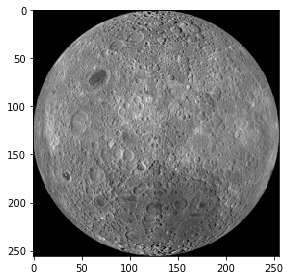

max filtered


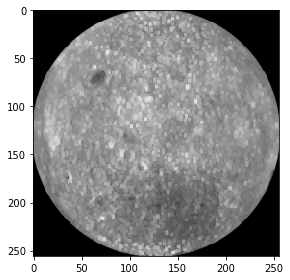

min filtered


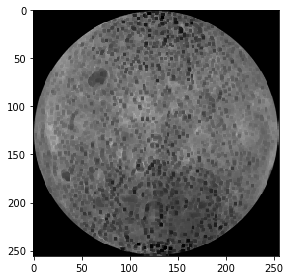

Original Image


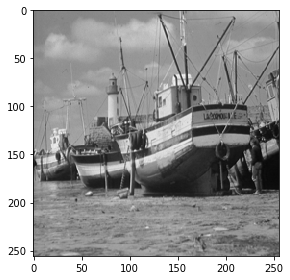

max filtered


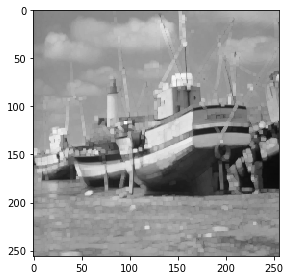

min filtered


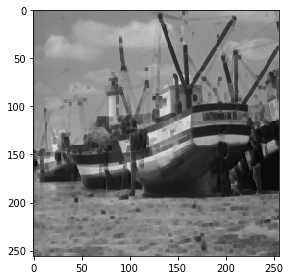

Original Image


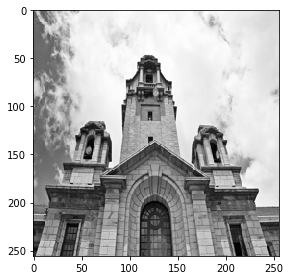

max filtered


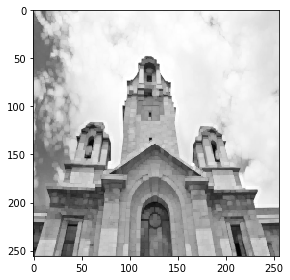

min filtered


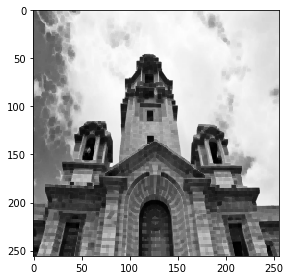

Original Image


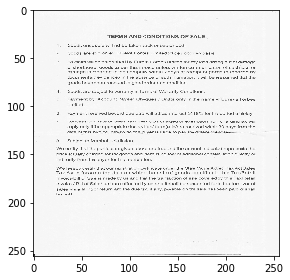

max filtered


C:\Users\Sephiroth\Anaconda2\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


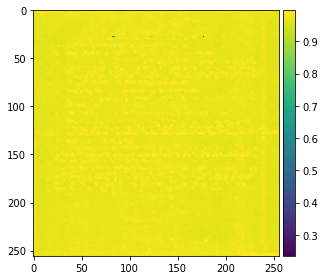

min filtered


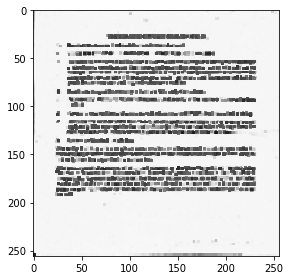

In [6]:
import numpy as np
from skimage import io,color,transform,img_as_ubyte
import matplotlib.pyplot as plt
import math
from  skimage.util import random_noise

image_path = r"C:\Users\Sephiroth\Downloads\iisc\DIP codes\{}"
images = ['moon.tiff','boat.tiff','IISc.tiff','ocr.jpg']
for image in images :
    im = transform.resize(color.rgb2gray(io.imread(image_path.format(image))),(256,256))
    print("Original Image")
    io.imshow(im)
    plt.show()


    neighborhood = (3,3)
    max_clean = max_filt(im,neighborhood,padding_type = "symmetric")
    min_clean = min_filt(im,neighborhood,padding_type = "symmetric")
    print("max filtered")
    io.imshow(max_clean)
    plt.show()
    print("min filtered")
    io.imshow(min_clean)
    plt.show()



We notice that for the OCR image , it is almost white after passing through a max filter
The moon appears to have spots 
